
# Predicting the Presence of Heart Disease using Age, Sex, and Cholesterol Levels

# Introduction
Heart Disease remains one of the top causes of morbidity & mortality worldwide; 
early detection and preventative measures are incredibly important when it comes to reducing its impact. There are several different kinds of heart disease, the most common is coronary artery disease. This occurs when plaque accumulates in the arteries and decreases or stops blood flow. Heart disease can cause chest pain, shortness of breath, weakness in extremities and in extreme cases death. It has many risk factors including high blood pressure, high cholesterol, smoking, diabetes and obesity. Risk also increases at older ages.      

## Question
This project seeks to answer the following question: can we predict the presence of heart disease in individuals based solely on their age, sex, and cholesterol levels?

## Dataset Description
The dataset our group chose for this project and analysis is the “Heart Disease” dataset from the UC Irvine Machine Learning Repository - it was one of the suggested datasets provided to us on Canvas. It consists of four databases; however, we chose to focus on the Cleveland database which contains 303 individual records, each with 14 attributes, including the target variable indicating the presence and severity of heart disease on a scale from zero to four. For simplification and to align with our binary classification goal, our team decided that this target will be converted to the following binary outcome: “Yes” for any non-zero value, which indicates the presence of heart disease, and “No” for a zero value, indicating its absence.


## Methods & Results:


### Step 1: Loading data from the original source on the web:
The data was downloaded and placed into the remote repository on GitHub. From there it was loaded into the file using the read_csv function.

In [62]:
### Run this cell before continuing.
library(tidyverse)
library(readr)
library(ggplot2)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [63]:
unscaled_heart_disease <- read_csv("https://raw.githubusercontent.com/angushf/heart_disease_project/main/processed.cleveland.data")

unscaled_heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Table 1.0:** An unscaled version of the heart_disease dataset being read-in and displayed using the read_csv() function.

### Step 2: Wrangling and cleaning the data from its original (downloaded) format to the format necessary for the planned analysis

#### 2.1: Turning variable "num" into a binary variable "has_disease" with "yes" indicating the presence of heart disease, and "no" indicating its absence
The original format included the target variable, "num", which indicated the presence and severity of heart disease on a scale from zero to four. For simplification and to align with our binary classification goal, our team decided that this target will be converted to the following binary outcome: “yes” for any non-zero value, which indicates the presence of heart disease, and “no” for a zero value, indicating its absence. Using a combination of the mutate() and ifelse() function, a new variable, "has_disease" was created based on the previous variable "num". Using the ifelse function any number greater than 0 was changed into "yes", while all other values were turned into "no". Using the as_factor function the variable was then changed into a factor from double, which is much more appropiate for a categorical variable. The select() function was then used to deselect variables "num", "ca", and "thal", which are no longer relevant for the rest of the project.

In [64]:
unscaled_heart_disease <- unscaled_heart_disease |>
  mutate(has_disease = ifelse(num > 0, "yes", "no")) |>
  select(-num, -ca, -thal) |>
  mutate(has_disease = as_factor(has_disease)) 

unscaled_heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,has_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,no
67,1,4,160,286,0,2,108,1,1.5,2,yes
67,1,4,120,229,0,2,129,1,2.6,2,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,yes
57,0,2,130,236,0,2,174,0,0.0,2,yes
38,1,3,138,175,0,0,173,0,0.0,1,no


**Table 2.0:** The unscaled_heart_disease dataset after wrangling and altering some of the existing data in the downloaded dataset.

#### 2.2: Scaling all predictors and creating a recipe

In order to get a reliable prediction, we must scale our data. This is because predictors have different size units of measurement and so those with larger units will incorrectly seem farther away. The functions step_scale() and step_center() are used to standardize data points to a mean of 0 and standard deviation of 1. Followed by the prep() function which calculates values needed for the recipe.


In [65]:
scaled_heart_disease_recipe <- recipe(has_disease ~ ., data = unscaled_heart_disease) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

scaled_heart_disease_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 11



── Training information 

Training data contained 303 data points and no incomplete rows.



── Operations 

• Scaling for: age, sex, cp, trestbps, chol, fbs, restecg, ... | Trained

• Centering for: age, sex, cp, trestbps, chol, fbs, restecg, ... | Trained



#### 2.3: Baking the scaled_heart_disease_recipe

The bake() function is used to apply the scaling and centering changes above to our unscaled data and create a standardized dataset.


In [66]:
scaled_heart_disease <- bake(scaled_heart_disease_recipe, unscaled_heart_disease)

scaled_heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,has_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.6850692,-2.2480557,0.7562740,-0.2644628,2.3904835,1.015005,0.01716893,-0.69548,1.0855423,2.2708221,no
1.3897030,0.6850692,0.8765355,1.6085589,0.7591593,-0.4169448,1.015005,-1.81889638,1.43311,0.3965257,0.6480412,yes
1.3897030,0.6850692,0.8765355,-0.6642009,-0.3417173,-0.4169448,1.015005,-0.90086373,1.43311,1.3439235,0.6480412,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.2833446,0.6850692,0.8765355,-0.09601098,-2.2344526,-0.4169448,-0.9951031,-1.512885,1.43311,0.1381444,0.6480412,yes
0.2833446,-1.4548891,-1.2065253,-0.09601098,-0.2065219,-0.4169448,1.0150052,1.066349,-0.69548,-0.8953805,0.6480412,yes
-1.8187363,0.6850692,-0.1649949,0.35854099,-1.3846531,-0.4169448,-0.9951031,1.022633,-0.69548,-0.8953805,-0.9747397,no


**Table 3.0:** Summary of the downloaded set after scaling it.

#### 2.4: Selecting variables used in analysis
The variables that will be used in our analysis are selected and all other columns removed using the select() function. The predictors we've decided to use are age, sex and cholesterol (chol) and has_disease is the predicted factor.

In [67]:
scaled_heart_disease_select <- scaled_heart_disease |>
    select(age, sex, chol, has_disease)

scaled_heart_disease_select

age,sex,chol,has_disease
<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.6850692,-0.2644628,no
1.3897030,0.6850692,0.7591593,yes
1.3897030,0.6850692,-0.3417173,yes
⋮,⋮,⋮,⋮
0.2833446,0.6850692,-2.2344526,yes
0.2833446,-1.4548891,-0.2065219,yes
-1.8187363,0.6850692,-1.3846531,no


**Table 4.0**: Summary of the newly scaled heart disease dataset after removing all variables that aren't of interest to us. 

### Step 3: Summarizing data in table

Our data is split into testing and training data. The training data will be used for data analysis and creating a model, while the testing data will be used to test the accuracy and recall of this model. We use our training data to summarize the number of individuals with or without heart disease. This table is chosen because it will tell us the proportion of the sample that has heart disease. 

The main scaled dataset scaled_heart_disease_select is being split into two subsets using the initial_split() function, with 75% of the data going to heart_disease_train and the remaining 25% to heart_disease_test. 
The split is stratified by the variable has_disease, ensuring that the proportion of cases with and without heart disease is consistent across both training and testing datasets.

After splitting, the training() and testing() functions are used to actually create the heart_disease_train and heart_disease_test datasets.
The glimpse() function is then used to get a quick look at the structure of the heart_disease_train dataset, revealing it has 227 rows and 4 columns.

In [68]:
heart_disease_split <- initial_split(scaled_heart_disease_select, prop = 0.75, strata = has_disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

glimpse(heart_disease_train)

Rows: 227
Columns: 4
$ age         <dbl> 0.94715962, -1.92937218, 0.17270875, 0.28334459, 0.1727087…
$ sex         <dbl> 0.6850692, 0.6850692, 0.6850692, 0.6850692, -1.4548891, 0.…
$ chol        <dbl> -0.264462814, 0.063868821, -0.206521937, -1.056321463, 0.9…
$ has_disease <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no…


The glimpse() function is applied to the heart_disease_test dataset. It is shown to have 76 rows and 4 columns. The columns are the same as in the training set, which includes standardized features like age, sex, cholesterol levels (chol), and the factor variable has_disease which indicates whether the person has heart disease.

In [69]:
glimpse(heart_disease_test)

Rows: 76
Columns: 4
$ age         <dbl> 1.38970298, -1.48682883, 0.28334459, 0.94715962, 0.1727087…
$ sex         <dbl> 0.6850692, -1.4548891, -1.4548891, 0.6850692, 0.6850692, -…
$ chol        <dbl> 0.7591593, -0.8245580, 2.0724859, 0.1411233, 0.1797506, -0…
$ has_disease <fct> yes, no, no, yes, yes, no, no, no, no, no, yes, yes, yes, …


In this box, the code is calculating the proportion of cases with and without heart disease in the training set. The heart_disease_train dataset is piped into a group_by() function to group the data by the ahs_disease column. Then, it uses summarize() to count the number of cases in each group. Finally, a mutate() function is applied to create a new column called percent, which is calculated by taking the count of cases, dividing by the total number of rows in heart_disease_train, and multiplying by 100 to get a percentage.

In [70]:
heart_disease_proportions <- heart_disease_train |>
    group_by(has_disease) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

heart_disease_proportions

has_disease,n,percent
<fct>,<int>,<dbl>
no,123,54.18502
yes,104,45.81498


**Table 5.0**: Displays the count and percentage of cases with and without heart disease

#### Table findings
From this table we discover that around 46% of our sample has heart disease. This shows that we have similar numbers of individuals with and without heart disease in our training data and we can use this to dataset make our predictions. 

### Step 4: Visualizing data

We decided to visualize our data by graphing cholesterol levels against age and colour coding our data by whether the individual has heart disease. The graph is made using the ggplot() function with geom_point() to create a scatter plot. 

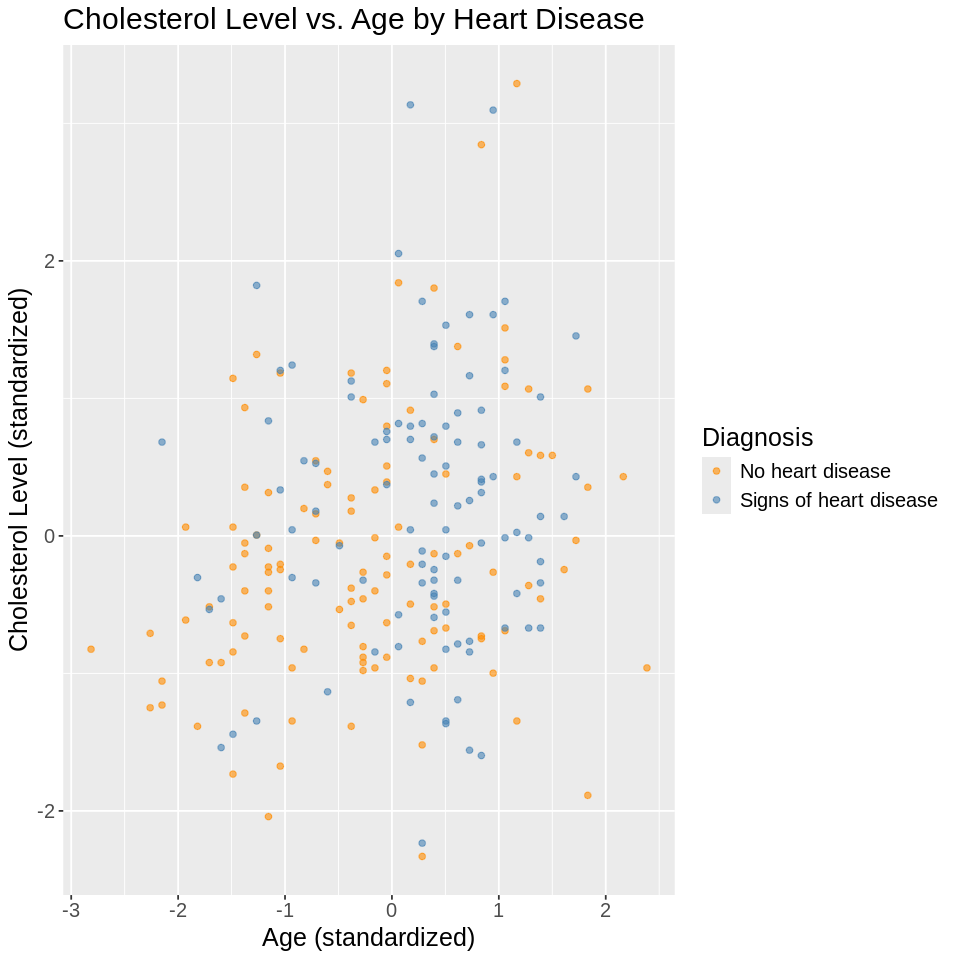

In [71]:
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_disease_plot <- ggplot(heart_disease_train, aes(x = age, y = chol, color = as.factor(has_disease))) +
  geom_point(alpha = 0.6) +
  labs(title = "Cholesterol Level vs. Age by Heart Disease",
       x = "Age (standardized)",
       y = "Cholesterol Level (standardized)",
       color = "Diagnosis") +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("no" = "No heart disease", "yes" = "Signs of heart disease")) +
  theme(text = element_text(size=15))

heart_disease_plot


**Figure 1.0:** Shows the relationship between Age and Cholesterol and how this relates to presence of heart disease.

#### Graph findings
This graph shows us that there is a weak positive relationship between age and cholesterol levels. As well, heart disease can be found throughout plot but is more common in older individuals with higher cholesterol levels.



### Step 5: Data analysis

Let's walk through the following piece of data analysis step by step.

**Creating a cross-validation plan**
- The vfold_cv() function is used to create a 5-fold cross-validation plan on the heart_disease_train dataset. This means the dataset is divided into 5 subsets, or folds, and the model will be trained and validated 5 separate times, each time using a different fold as the validation set and the remaining as the training set. The stratification by has_disease ensures that each fold has a proportional representation of both classes.

**Specifying the model**
- A recipe is specified using the recipe() function, defining the outcome has_disease and predictors from the heart_disease_train dataset.
- The nearest_neighbor() function defines the k-nearest neighbors model specification, with a tuning parameter for the number of neighbors and a weight function set to "rectangular" which means that all neighbors are weighted equally.
- The set_engine() function sets "kknn" as the computational engine for the knn algorithm, and set_mode specifies the mode as "classification" because the goal is to classify whether individuals have heart disease or not.

**Setting up the tuning grid**
- The tune_grid() function is used to perform the actual model tuning over the predefined cross-validation folds and neighbor values.
- collect_metrics() gathers the performance metrics from the tuning, specifically looking at the accuracy of the model with different numbers of neighbors.
- The filter() function is then used to keep only the rows of the resulting metrics tibble where the metric is "accuracy".

**Plotting the results**
- The plotting code creates a visualization (Figure 2.0) of the accuracy metric for the different numbers of neighbors using ggplot. The plot has the number of neighbors on the x-axis and the mean accuracy on the y-axis, represented by points connected with lines. This is intended to help visualize which numbers of neighbors leads to the highest accuracy.

**Determining the optimal number of neighbors**
- The workflow results are sorted in descending order by mean accuracy, and the head(1) function is used to select the top result, which represents the best-performing number of neighbors. The pull() function extracts the number of neighbors from this top result.
  

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5689152,5,0.01938315,Preprocessor1_Model01
6,accuracy,binary,0.6219763,5,0.02998346,Preprocessor1_Model02
11,accuracy,binary,0.6125867,5,0.02950714,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,accuracy,binary,0.6561704,5,0.03992065,Preprocessor1_Model08
41,accuracy,binary,0.6650637,5,0.04476334,Preprocessor1_Model09
46,accuracy,binary,0.6604172,5,0.04069746,Preprocessor1_Model10


[1] 41

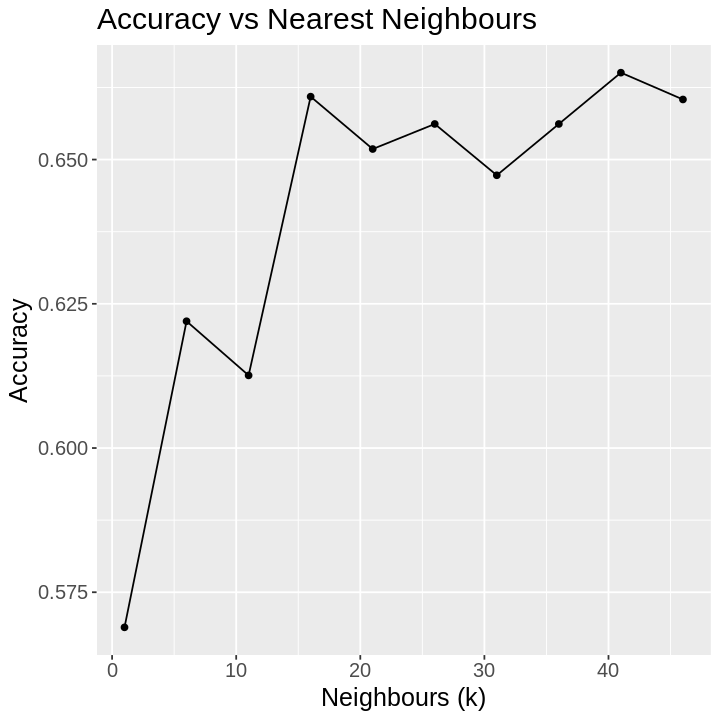

In [84]:
set.seed(425)
training_vfold <- vfold_cv(heart_disease_train, v = 5, strata = has_disease)

training_recipe <- recipe(has_disease ~ ., data = heart_disease_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

values <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

cross_val_workflow <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = training_vfold, grid = values) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

options(repr.plot.width = 6, repr.plot.height = 6) 
cross_val_plot <- ggplot(cross_val_workflow, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbours (k)") +
    ylab("Accuracy") +
    ggtitle("Accuracy vs Nearest Neighbours") +
    theme(text = element_text(size = 15))

cross_val_plot

cross_val_workflow

k_value <- cross_val_workflow |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

k_value

**Table 6.0:** KNN model accuracy with different neighbor counts <br>
**Figure 2.0:** Plot of model accuracy as a function of number of neighbors 

#### 5.1: Creating the actual model

We finalized our k-nearest neighbors classification model using the optimal K value of 41. The nearest_neighbor() function sets K to 41, set_engine("knnn") specifies the computational engine, and set_mode("classification") confirms it's for categorical predictions. We created a workflow that combines the preprocessing recipe and the knn model specification. The final step is fitting this model on the heart_disease_train dataset to prepare it for predictions.

In [81]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_disease_train)


#### 5.2 Evaluating predictions
Predictions for the testing data set are made using predict() and added as a new column to the dataset with bind_cols().

In order to evaluate our model, we calculate the accuracy, precision and recall of our predictions.
Positive predictions mean that the individual has heart disease.
$$ accuracy= # correct predictions / # predictions $$
$$ precision = # correct positive predictions / # total positive predictions $$
$$ recall= # correct positive predictions / # positive data points $$

A confusion matrix is made to see ratios between positive and negative predictions and results. The metrics function sets the true value and estimate columns and filter() removes all rows that are not measuring accuracy. The predict() function is used to find predictive accuracy. 

In order to do recall and precision, the correct positive results must be used for measurements. The function pull() is used to determine which outcome is first. Then event_level = "second" is used to set the second response as a positive value. Recall and Precision are measured using "yes" to has_disease as a positive result.



In [83]:
heart_test_predictions <- predict(heart_fit, heart_disease_test) |>
    bind_cols(heart_disease_test)

heart_test_metrics <- heart_test_predictions |>
    metrics(truth = has_disease, estimate = .pred_class) |>
    filter(.metric == "accuracy")

heart_test_metrics

heart_conf_mat <- heart_test_predictions |>
    conf_mat(truth = has_disease, estimate = .pred_class)

heart_conf_mat



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6447368


          Truth
Prediction no yes
       no  32  18
       yes  9  17

**Table 7.0:** Model accuracy metric <br>
**Table 8.0:** Confusion matrix for predicted vs. true labels

In [85]:
heart_responses <- heart_test_predictions |>
    pull(has_disease) |>
    levels()

heart_responses

heart_precision <- heart_test_predictions |>
  precision(truth = has_disease, estimate = .pred_class, event_level = "second")

heart_precision

[1] "no"  "yes"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6538462


**Table 9.0:** Model precision metric 

In [76]:
heart_recall <- heart_test_predictions |>
  recall(truth = has_disease, estimate = .pred_class, event_level = "second")

heart_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.4857143


**Table 10.0:** Model recall metric

## Discussion:
Using the knn classification model and the optimal K value of 41, we found that we can predict the presence of heart disease in people based on age, sex, and cholesterol levels with 64.5% accuracy. We had a precision of 64.4% and a recall of 48.6%. An accuracy of 64.5% and precision of 64.4% indicates a weak level of correlation between our predicting variables and heart disease, which was expected. What was unexpected, however, was a recall of 48.6%. This indicates the model only correctly predicted less than half of the true positives. Considering we are predicting a binary variable, a random shot in the dark would have had an accuracy of 50%. Considering we are predicting heart disease, false negatives are detrimental, it is critical to catch all cases of heart disease so that the patients can mitigate and delay its negative impacts.

The impact of these findings is significant. Firstly, it suggests that relying on simplistic models with limited variables can lead to high rates of missed diagnoses in clinical practice. The underperformance in terms of recall specifically suggests that many patients who do have heart disease may not be identified, which could delay necessary interventions. This stresses the importance of developing more comprehensive models that can more accurately identify at-risk individuals. The higher levels of accuracy and precision of ~64.5% do however suggest that these variables are likely advantageous to include in more comprehensive models with additional predicting variables. The primary question that this study raises is how can the addition of more variables, such as blood pressure, heart rate and blood sugar levels improve the model’s accuracy and especially its recall? 


## References:

&nbsp; &nbsp; &nbsp; &nbsp; Hassan, Ch Anwar Ul, et al. “Effectively Predicting the Presence of Coronary Heart Disease Using Machine Learning Classifiers.” National Library of Medicine, U.S. National Library of Medicine, 23 Sept. 2022, www.ncbi.nlm.nih.gov/pmc/articles/PMC9573101/. 

&nbsp; &nbsp; &nbsp; &nbsp; Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

&nbsp; &nbsp; &nbsp; &nbsp; MayoClinic. “Heart Disease.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 25 Aug. 2022, www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(chttps://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(congenital%20heart%20defects)ongenital%20heart%20defects). 
